In [0]:
from fastai.vision import*

###Download Data

In [0]:
folder = 'Brownrice'
file = 'urls_Brownrice.csv'
path = Path('data/plant')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=200)

In [0]:
folder = 'Wheat'
file = 'urls_Wheat.csv'
path = Path('data/plant')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=200)

In [0]:
folder = 'Maize'
file = 'urls_Maize.csv'
path = Path('data/plant')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=200)

folder = 'Corn'
files = 'urls_Corn.csv'
path = Path('data/plant')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
classes = ['Wheat','Brownrice','Maize']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

### **Data View**

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['Brownrice', 'Maize', 'Wheat']

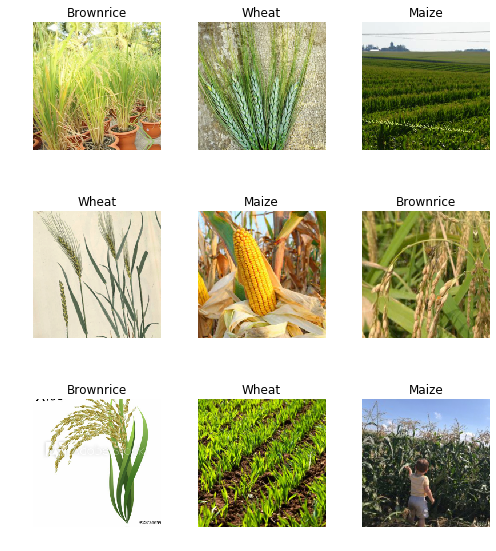

In [0]:
data.show_batch(rows=3, figsize=(7,8))


In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Brownrice', 'Maize', 'Wheat'], 3, 224, 55)

###Train

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 110708018.16it/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.345175,1.210807,0.781818,00:07
1,1.085232,0.952120,0.436364,00:05
2,0.892933,0.831172,0.345455,00:04
3,0.761888,0.788550,0.254545,00:04


In [0]:
learn.save('stage-1_Resnet-34')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


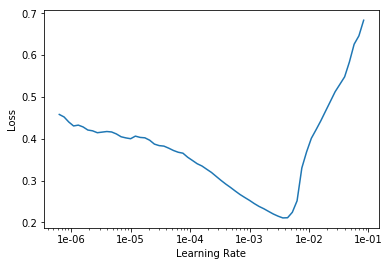

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.444890,0.750935,0.236364,00:05
1,0.410784,0.702769,0.200000,00:05


In [0]:
learn.save('stage-2_resnet-34')

###Check


In [0]:
learn.load('stage-2_resnet-34');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

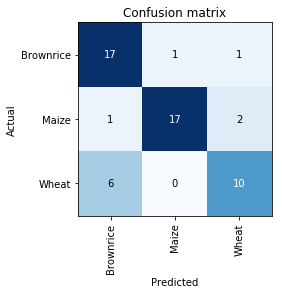

In [0]:
interp.plot_confusion_matrix()

In [0]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

###Dataset Cleanup

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2_resnet-34')

Learner(data=ImageDataBunch;

Train: LabelList (279 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Maize,Maize,Maize,Maize,Maize
Path: data/plant;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/plant;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fal

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

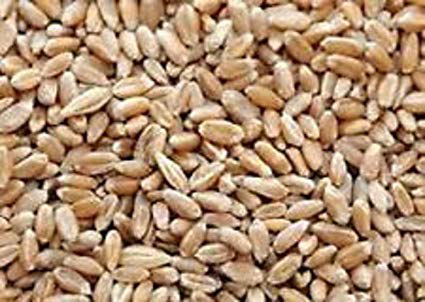

In [0]:
img = open_image(path/'Wheat'/'00000021.jpg')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Wheat